# Local Marginal Price

# Overview
The following sections analyse the Local Marginal Price (PML) for the Cancún node, identify its seasonal behaviour, evaluate day-of-week and intraday patterns, and summarise the performance of a predictive Random-Forest model. 

## Get Data Automaticali

[Servicio Web - PML](https://www.cenace.gob.mx/DocsMEM/2022-06-24%20Manual%20T%C3%A9cnico%20SW-PML.pdf)

In [2]:
import pandas as pd

In [ ]:
import requests
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# Global Variables
# This code fetched information from the Cenace API
# Only fetches data from the last 2 years and nodes starting with 08(region code for CANCUN)
NODOS = [
'08AKD-115', '08AKI-115', '08ALO-115', '08AUC-115', '08AVP-115',
       '08BEL-115', '08BNI-115', '08BNP-115', '08CAS-115', '08CBR-115',
       '08CBU-115', '08CEK-115', '08CEX-115', '08CHB-34.5', '08CHS-34.5',
       '08CKD-115', '08CLC-115', '08CMO-115', '08CMY-115', '08CNC-115',
       '08CNO-115', '08CNR-115', '08COZ-34.5', '08CRE-115', '08CTE-115',
       '08CYL-115', '08DZI-115', '08ESA-115', '08HAA-115', '08HBK-115',
       '08HCE-115', '08HNC-115', '08HOL-115', '08HOP-115', '08IBR-115',
       '08IGN-115', '08INS-115', '08IXC-115', '08IZE-115', '08IZI-115',
       '08IZL-115', '08KAB-115', '08KAH-230', '08KAL-115', '08KBL-115',
       '08KEK-115', '08KHN-115', '08KOP-115', '08KUK-115', '08LAC-115',
       '08LEE-115', '08LRA-115', '08LTE-115', '08MAX-115', '08MDA-115',
       '08MDN-115', '08MDP-230', '08MEP-115', '08MHH-115', '08MPA-115',
       '08MTO-115', '08MYK-115', '08NCM-115', '08NCT-115', '08NIH-115',
       '08NIZ-115', '08NTE-115', '08PCN-115', '08PJU-115', '08PKP-115',
       '08PLY-115', '08PMO-115', '08PMR-115', '08PMU-115', '08PPH-115',
       '08PPO-115', '08PSA-115', '08PTE-115', '08PYU-115', '08SAD-115',
       '08SAE-115', '08SAM-115', '08SBY-115', '08SDM-115', '08SHC-115',
       '08SLC-230', '08SUC-115', '08SUR-115', '08TIU-115', '08TKD-115',
       '08TUM-115', '08TXM-115', '08TXS-115', '08TZM-115', '08UCU-115',
       '08UMA-115', '08VAD-115', '08VAD-230', '08VDD-115', '08XLC-115',
       '08XPU-115', '08XUL-115', '08YXE-115', '08ZNE-115'
]
SISTEMA, PROCESO, FORMATO = "SIN", "MDA", "JSON"
START_DATE = datetime(2023,1,1)
END_DATE   = datetime(2025,5,26)
DELTA      = timedelta(days=7)
MAX_WORKERS = 10  

def generar_urls():
    urls = []
    current = START_DATE
    while current <= END_DATE:
        current_end = min(current + DELTA - timedelta(days=1), END_DATE)
        for i in range(0, len(NODOS), 20):
            batch = ",".join(NODOS[i:i+20])
            url = (
                f"https://ws01.cenace.gob.mx:8082/SWPML/SIM/"
                f"{SISTEMA}/{PROCESO}/{batch}/"
                f"{current.year}/{current.month:02}/{current.day:02}/"
                f"{current_end.year}/{current_end.month:02}/{current_end.day:02}/"
                f"{FORMATO}"
            )
            urls.append(url)
        current = current_end + timedelta(days=1)
    return urls

def fetch(session, url):
    try:
        r = session.get(url, timeout=10)
        r.raise_for_status()
        return r.json().get("Resultados", [])
    except Exception as e:
        print(f"Error en {url}: {e}")
        return []

def main():
    urls = generar_urls()
    all_data = []

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        with requests.Session() as session:
            # disparar todas las peticiones
            futures = [executor.submit(fetch, session, url) for url in urls]
            for fut in as_completed(futures):
                resultados = fut.result()
                for nodo in resultados:
                    for valor in nodo["Valores"]:
                        all_data.append({
                            "nodo":    nodo["clv_nodo"],
                            "fecha":   valor["fecha"],
                            "hora":    valor["hora"],
                            "pml":     valor["pml"],
                            "pml_ene": valor["pml_ene"],
                            "pml_per": valor["pml_per"],
                            "pml_cng": valor["pml_cng"],
                        })

    df = pd.DataFrame(all_data)
    print(df.head())
    return df

if __name__ == "__main__":
    df = main()


Error en https://ws01.cenace.gob.mx:8082/SWPML/SIM/SIN/MDA/08SAE-115,08SAM-115,08SBY-115,08SDM-115,08SHC-115,08SLC-230,08SUC-115,08SUR-115,08TIU-115,08TKD-115,08TUM-115,08TXM-115,08TXS-115,08TZM-115,08UCU-115,08UMA-115,08VAD-115,08VAD-230,08VDD-115,08XLC-115/2023/01/01/2023/01/07/JSON: HTTPSConnectionPool(host='ws01.cenace.gob.mx', port=8082): Read timed out. (read timeout=10)
Error en https://ws01.cenace.gob.mx:8082/SWPML/SIM/SIN/MDA/08CNO-115,08CNR-115,08COZ-34.5,08CRE-115,08CTE-115,08CYL-115,08DZI-115,08ESA-115,08HAA-115,08HBK-115,08HCE-115,08HNC-115,08HOL-115,08HOP-115,08IBR-115,08IGN-115,08INS-115,08IXC-115,08IZE-115,08IZI-115/2023/01/15/2023/01/21/JSON: HTTPSConnectionPool(host='ws01.cenace.gob.mx', port=8082): Read timed out. (read timeout=10)


In [ ]:
# Extract data if necessary
#df.to_csv("data_2023-2025-5-27.csv", index=False, encoding="utf-8")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900032 entries, 0 to 1900031
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   nodo     object 
 1   fecha    object 
 2   hora     int64  
 3   pml      float64
 4   pml_ene  float64
 5   pml_per  float64
 6   pml_cng  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 101.5+ MB


In [5]:
df.isna().sum()

nodo       0
fecha      0
hora       0
pml        0
pml_ene    0
pml_per    0
pml_cng    0
dtype: int64

In [6]:
# Convert Data Types

df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
cols_numericas = ['pml', 'pml_ene', 'pml_per', 'pml_cng']
df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric, errors='coerce')
df['hora'] = pd.to_numeric(df['hora'], errors='coerce').astype('int64') 

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha,1900032,2024-03-23 15:09:40.598220800,2023-01-08 00:00:00,2023-08-21 00:00:00,2024-04-05 00:00:00,2024-10-23 00:00:00,2025-05-26 00:00:00,NaN
hora,1900032.0,12.5,1.0,6.75,12.5,18.25,24.0,6.922188
pml,1900032.0,1943.441796,-361.0,534.06,798.04,1817.6625,30426.48,2797.686572
pml_ene,1900032.0,825.453007,-0.01,429.82,576.48,918.71,25590.57,940.026855
pml_per,1900032.0,145.292514,-1119.05,63.76,98.61,169.98,4835.91,167.104564
pml_cng,1900032.0,972.696851,-5930.9,-0.1,0.19,260.4825,19787.77,2497.265004


## Feature Engineering 

In [8]:
# Extract week day from date
# 0 = Monday, 6 = Sunday
df['año'] = df['fecha'].dt.year
df['weekday'] = df['fecha'].dt.weekday
df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_año']  = df['fecha'].dt.dayofyear
df['fin_de_semana']   = df['weekday'].isin([5,6]).astype(int)
df.head()

,nodo,fecha,hora,pml,pml_ene,pml_per,pml_cng,año,weekday,mes,dia_mes,dia_año,fin_de_semana
0,08XPU-115,2023-01-08,1,656.65,579.21,77.38,0.06,2023,6,1,8,8,1
1,08XPU-115,2023-01-08,2,616.46,549.53,66.92,0.02,2023,6,1,8,8,1
2,08XPU-115,2023-01-08,3,593.98,530.85,63.05,0.09,2023,6,1,8,8,1
3,08XPU-115,2023-01-08,4,579.47,526.72,52.66,0.09,2023,6,1,8,8,1
4,08XPU-115,2023-01-08,5,573.00,517.66,55.26,0.09,2023,6,1,8,8,1


In [9]:
df.columns

Index(['nodo', 'fecha', 'hora', 'pml', 'pml_ene', 'pml_per', 'pml_cng', 'año',
       'weekday', 'mes', 'dia_mes', 'dia_año', 'fin_de_semana'],
      dtype='object')

## EDA 


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# PML by Date
### 2.1 Seasonality: Summer vs Winter
Distinct PML peaks appear every May–July — high-tourism season with intense air-conditioning demand. In the colder months (Dec–Feb) prices plunge, sometimes below 1 000 $/MWh. 

### 2.2 Congestion as the Main Driver of Peaks
The pml_cng component (orange) mirrors total PML (blue); during peak hours congestion explains ≈ 70–80 % of the marginal price. 

### 2.3 Isolated Anomalies
A few negative pml_cng values in June 2024 suggest refunds or atypical reverse-flow events. The extreme PML spike that month (≈ 30 000 $/MWh) signals an exceptional incident such as major maintenance, a widespread outage, or an intense heatwave. 

### 2.4 Long-Term Trend
The 30-day moving average shows volatility easing after the mid-2024 spike, but a fresh upward drift appears in 2025, likely tied to higher base demand or sustained line constraints. 

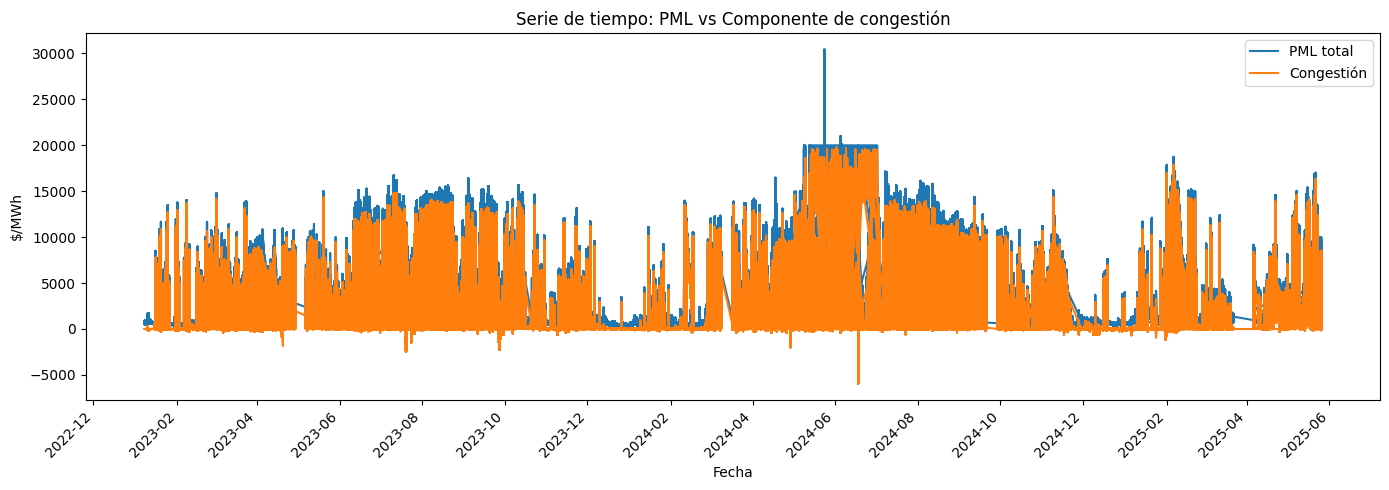

In [11]:
fig, ax = plt.subplots(figsize=(14, 5))

# Chart for PML and Congestion
ax.plot(df['fecha'], df['pml'],     label='PML total')
ax.plot(df['fecha'], df['pml_cng'], label='Congestión')

# Title and labels
ax.set_title('Serie de tiempo: PML vs Componente de congestión')
ax.set_xlabel('Fecha')
ax.set_ylabel('$/MWh')

# Define a locator every 2 months and a formatter 'YYYY-MM'
locator   = mdates.MonthLocator(interval=2)
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotate labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 3 · Monthly PML Trend 

| Season / Month‑range | Typical Price Level | Key Drivers |
|----------------------|---------------------|-------------|
| **Winter low season (Dec–Feb)** | **~700–1 100 $/MWh** | Mild weather, reduced demand |
| **Spring rise (Mar–May)** | **~1 400 → 3 200 $/MWh** | Rising temperatures, tourism, A/C load |
| **Summer peak (July)** | **~3 700 $/MWh** | Maximum congestion on peninsula lines |
| **Autumn decline (Jul–Oct)** | **~3 200 → 2 100 $/MWh** | Gradual normalisation of flows |
| **Return to lows (Nov–Dec)** | **~1 000 → 700 $/MWh** | Demand subsides toward year‑end |


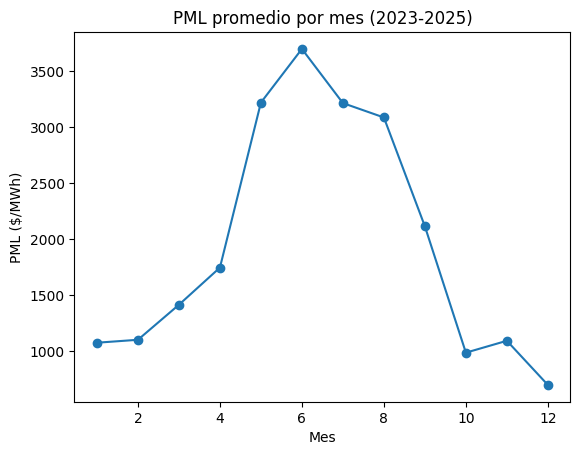

In [12]:
# Monthly trend of PML
monthly = df.groupby('mes')['pml'].mean()
plt.figure()
monthly.plot(marker='o')
plt.title('PML promedio por mes (2023-2025)')
plt.xlabel('Mes')
plt.ylabel('PML ($/MWh)')
plt.show()

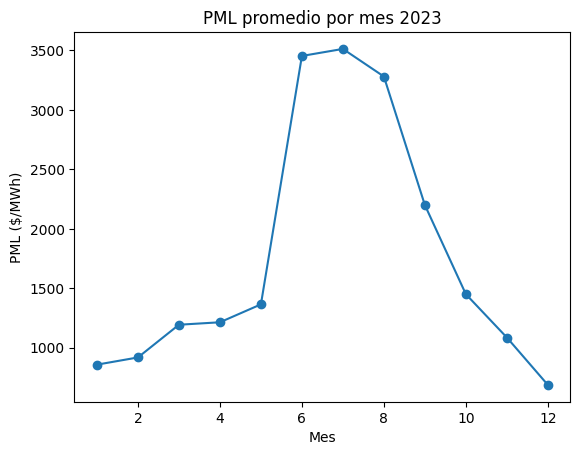

In [13]:
# Monthly PML 2023
monthly = df[df['año'] == 2023].groupby('mes')['pml'].mean()
plt.figure()
monthly.plot(marker='o')
plt.title('PML promedio por mes 2023')
plt.xlabel('Mes')
plt.ylabel('PML ($/MWh)')
plt.show()


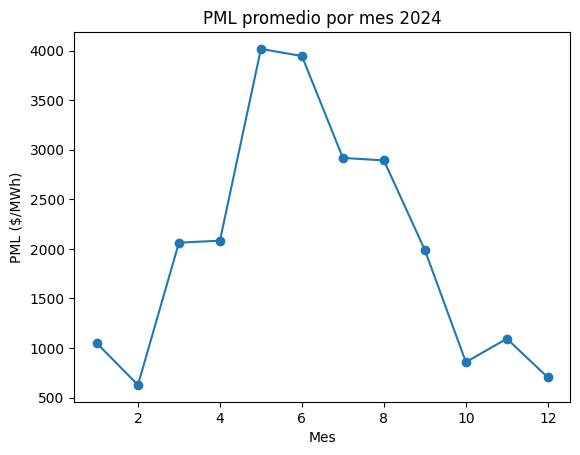

In [14]:
# Monthly Trend PML 2024
monthly = df[df['año'] == 2024].groupby('mes')['pml'].mean()
plt.figure()
monthly.plot(marker='o')
plt.title('PML promedio por mes 2024')
plt.xlabel('Mes')
plt.ylabel('PML ($/MWh)')
plt.show()

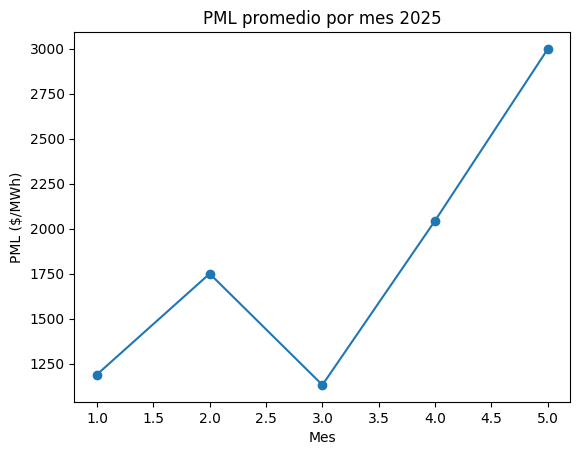

In [15]:
# Monthly Trend PML 2025
monthly = df[df['año'] == 2025].groupby('mes')['pml'].mean()
plt.figure()
monthly.plot(marker='o')
plt.title('PML promedio por mes 2025')
plt.xlabel('Mes')
plt.ylabel('PML ($/MWh)')
plt.show()

# 4 · Box‑plot by Day of Week

* **Monday → Friday upward drift.** Median climbs from ~700 $/MWh (Mon) to ~950 $/MWh (Fri).  
* **Friday: most volatile & costly.** Largest IQR and whiskers; “normal” highs near 4 500 $/MWh.  
* **Weekend relief.** Saturday’s median drops to ~850 $/MWh; Sunday bottoms at ~550 $/MWh with the narrowest spread.  
* **Right‑skewed tails.** Long upper whiskers reveal rare but very high congestion spikes; extended lower whiskers reflect calculation bounds when extreme negative pml_cng cases are excluded.  


/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_92289/3146044785.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_wd, labels=labels, showfliers=False)  # ocultamos outliers


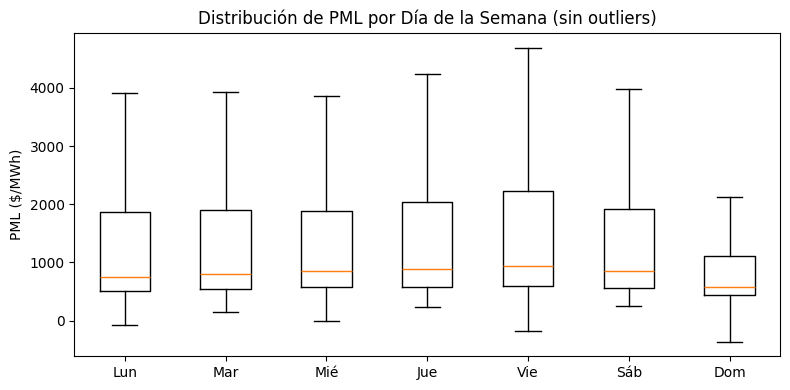

In [16]:
#Boxplot for PML by weekday
data_wd = [df[df['weekday']==i]['pml'].dropna() for i in range(7)]
labels  = ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom']

plt.figure(figsize=(8,4))
plt.boxplot(data_wd, labels=labels, showfliers=False)  # ocultamos outliers
plt.title('Distribución de PML por Día de la Semana (sin outliers)')
plt.ylabel('PML ($/MWh)')
plt.tight_layout()
plt.show()

# 5 · Congestion Heat‑map

* **Evening maxima (21:00–23:00, Mon–Fri):** ~1 800–2 000 $/MWh once the network is heavily loaded after the evening peak.  
* **Mid‑day shoulder (13:00–16:00):** Moderate congestion band across weekdays.  
* **Saturday follows weekday pattern** but 100–200 $/MWh lower.  
* **Sunday is much calmer** (~500–1 000 $/MWh).  
* **Night‑time lows (00:00–06:00):** < 200 $/MWh when demand is minimal.  
* **Morning ramp‑up (08:00–12:00):** 600–1 000 $/MWh during the start of daily activities.  


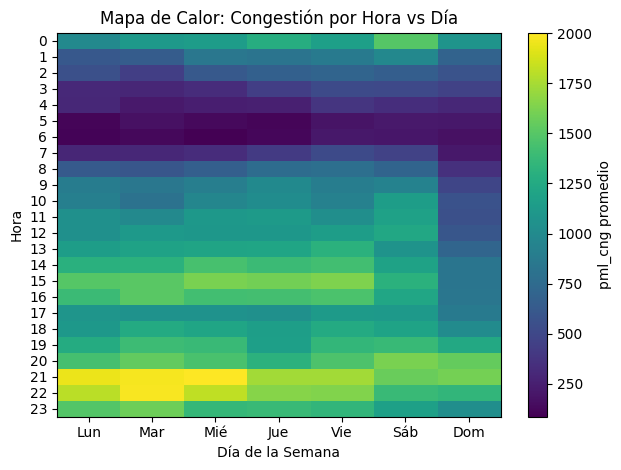

In [17]:
# Heat Map of PML congestion by weekday and hour
pivot = df.pivot_table(index='hora', columns='weekday', values='pml_cng', aggfunc='mean')
plt.figure()
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='pml_cng promedio')
plt.xticks(range(7), ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom'])
plt.yticks(range(0,24), range(0,24))
plt.title('Mapa de Calor: Congestión por Hora vs Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora')
plt.tight_layout()
plt.show()

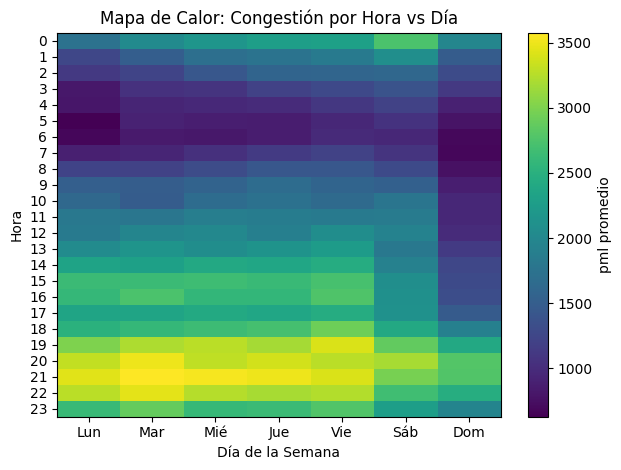

In [18]:
# Heatmap of PML by weekday and hour
pivot = df.pivot_table(index='hora', columns='weekday', values='pml', aggfunc='mean')
plt.figure()
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='pml promedio')
plt.xticks(range(7), ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom'])
plt.yticks(range(0,24), range(0,24))
plt.title('Mapa de Calor: Congestión por Hora vs Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora')
plt.tight_layout()
plt.show()

/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


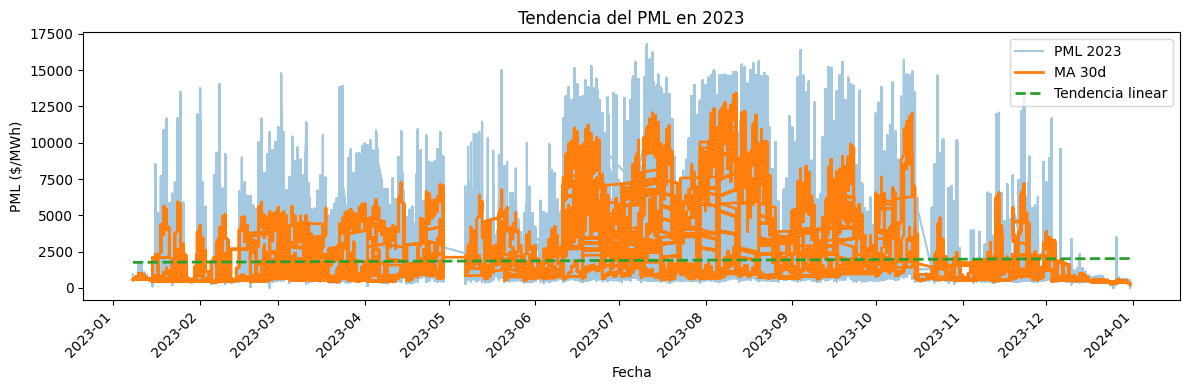

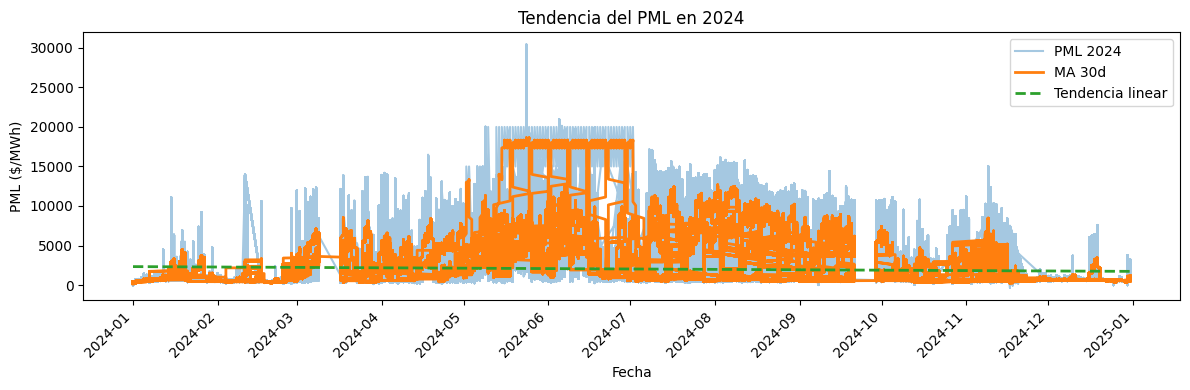

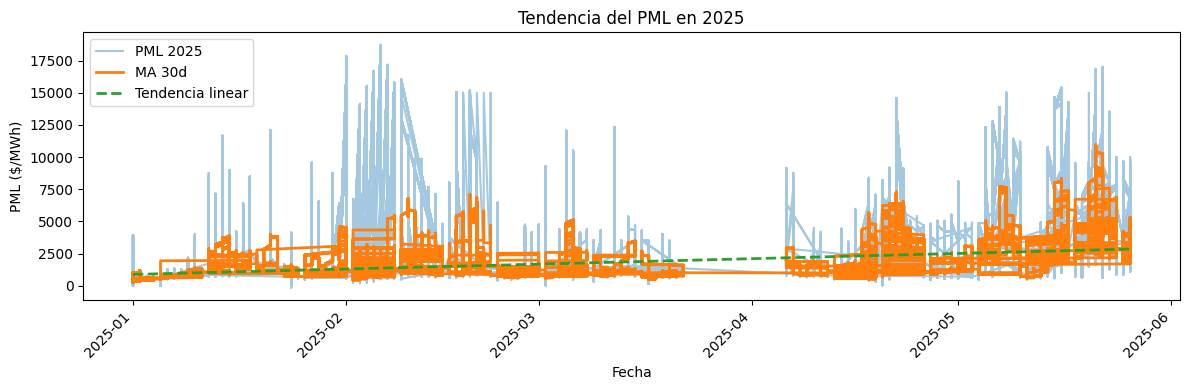

In [19]:
import numpy as np 

for year in [2023, 2024, 2025]:
    # Filter by year
    df_year = df[df['fecha'].dt.year == year].copy()
    fechas = df_year['fecha']
    pmls   = df_year['pml']
    
    # Calculate moving average (window=30 days)
    pml_ma30 = pmls.rolling(window=30, min_periods=1, center=True).mean()

    # Adjust a linear trend
    # Convert dates to floating numbers
    x_num = mdates.date2num(fechas)
    coef  = np.polyfit(x_num, pmls, deg=1)
    trend = np.poly1d(coef)(x_num)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(fechas, pmls,      color='C0', alpha=0.4, label=f'PML {year}')
    ax.plot(fechas, pml_ma30,  color='C1', lw=2,       label='MA 30d')
    ax.plot(fechas, trend,     '--',      color='C2', lw=2, label='Tendencia linear')
    
    # Format dates in X axis
    locator   = mdates.MonthLocator(interval=1)
    formatter = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    # Titles and labels
    ax.set_title(f'Tendencia del PML en {year}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('PML ($/MWh)')
    ax.legend()
    
    # Rotate labels and adjust layout
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 6 · Predictive‑Model Development  

1. **Cyclical features:** Hour / weekday / month encoded as sine–cosine pairs to preserve circularity.  
2. **Time‑series features:**  
   * **Lags** (e.g., previous hour, previous day) capture strong intra‑day autocorrelation.  
   * **Moving averages** smooth recent trends.  
3. **Temporal split:** 5‑fold expanding **TimeSeriesSplit** prevents information leakage.  
4. **Algorithm:** **RandomForestRegressor** — robust to collinearity, no scaling needed.  
5. **Performance:**  
   * **MSE:** 600 831.21  
   * **RMSE:** 775.13 $/MWh  
   * **R²:** 0.85  
   This explains 85 % of variance; error is acceptable versus a 500–4 000 $/MWh range, yet could shrink with hyper‑parameter tuning, exogenous weather/tourism inputs, or explicit seasonal models (SARIMAX, Prophet).  



In [20]:
# Bring cirularity to the time features
df['hora_sin'] = np.sin(2*np.pi * df['hora']/24)
df['hora_cos'] = np.cos(2*np.pi * df['hora']/24)
df['wd_sin']  = np.sin(2*np.pi * df['weekday']/7)
df['wd_cos']  = np.cos(2*np.pi * df['weekday']/7)
df['mes_sin'] = np.sin(2*np.pi * (df['mes']-1)/12)
df['mes_cos'] = np.cos(2*np.pi * (df['mes']-1)/12)

In [21]:
# calculate the lag features 
# values 1 hour before and 24 hours before
df['pml_lag1']  = df['pml'].shift(1) # hour before
df['pml_lag24'] = df['pml'].shift(24) # 24 hours before

In [22]:
# Average of the past time
df['pml_ma3']  = df['pml'].rolling(3).mean() # 3 hours ago
df['pml_ma24'] = df['pml'].rolling(24).mean() # 24 hours ago

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# features and target variable
features = ['hora_sin','hora_cos','wd_sin','wd_cos',
            'mes_sin','mes_cos','fin_de_semana',
            'pml_lag1','pml_lag24','pml_ma3','pml_ma24']
X = df[features]
y = df['pml']

In [25]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

## Entrenamiento del Modelo

In [26]:
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

## Metricas

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f'''
MSE: {mse:.2f}
RMSE: {rmse:.2f}
R2: {r2:.2f}
''')


MSE: 600831.21
RMSE: 775.13
R2: 0.85



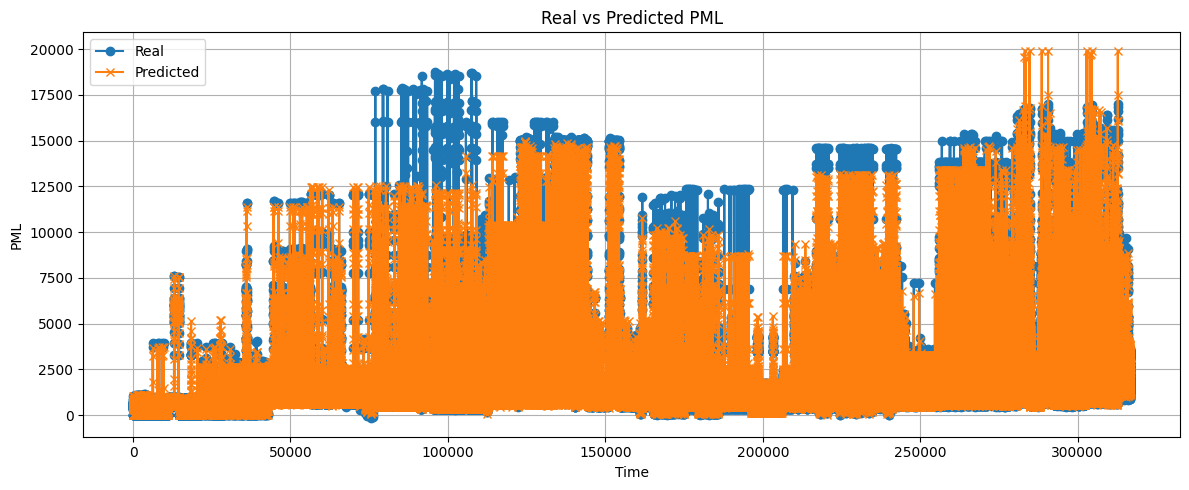

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Real vs Predicted PML")
plt.xlabel("Time")
plt.ylabel("PML")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


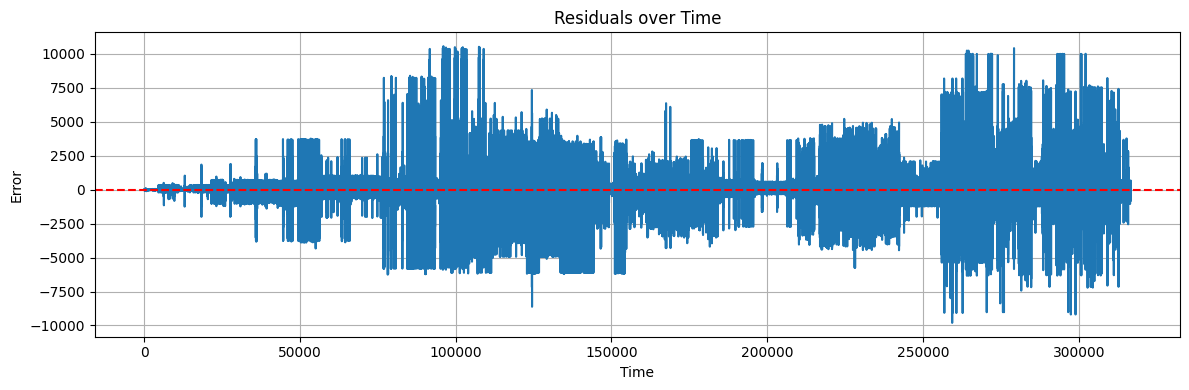

In [30]:
residuals = y_test.values - y_pred

plt.figure(figsize=(12, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals over Time")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


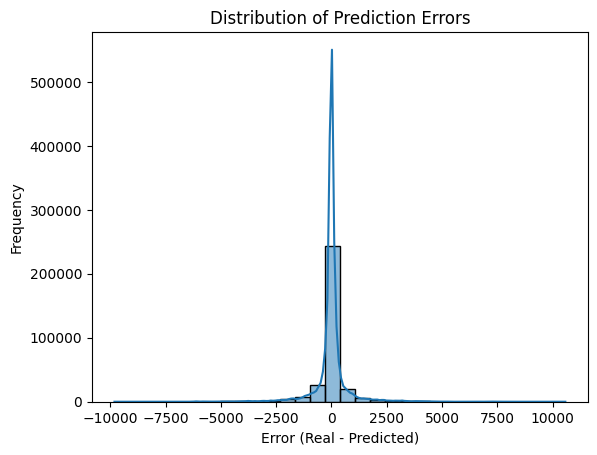

In [31]:
import seaborn as sns

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Real - Predicted)")
plt.ylabel("Frequency")
plt.show()


El modelo obtiene una precision alta de 84% 

## Reentrenar el modelo para predecir las proximas 24h

In [35]:
# 1) Reentrena tu modelo sin lag ni MA:
features_simple = [
    'hora_sin','hora_cos',
    'wd_sin','wd_cos',
    'mes_sin','mes_cos',
    'fin_de_semana'
]
X_simple = df[features_simple]
y = df['pml']
final_model = RandomForestRegressor(n_estimators=30, random_state=42)
final_model.fit(X_simple, y)

# 2) Crea features cíclicos en future
future = pd.DataFrame({'fecha': future_dates})
future['hora']        = future['fecha'].dt.hour
future['weekday']     = future['fecha'].dt.weekday
future['mes']         = future['fecha'].dt.month
future['fin_de_semana'] = future['weekday'].isin([5,6]).astype(int)

future['hora_sin'] = np.sin(2*np.pi * future['hora']/24)
future['hora_cos'] = np.cos(2*np.pi * future['hora']/24)
future['wd_sin']   = np.sin(2*np.pi * future['weekday']/7)
future['wd_cos']   = np.cos(2*np.pi * future['weekday']/7)
future['mes_sin']  = np.sin(2*np.pi * (future['mes']-1)/12)
future['mes_cos']  = np.cos(2*np.pi * (future['mes']-1)/12)

# 3) Predecir
X_fut_simple = future[features_simple]
future['pml_pred'] = final_model.predict(X_fut_simple)
print(future[['fecha','pml_pred']])


                 fecha     pml_pred
0  2025-05-26 01:00:00  3116.221248
1  2025-05-26 02:00:00  2281.932805
2  2025-05-26 03:00:00  2520.986640
3  2025-05-26 04:00:00  1898.190730
4  2025-05-26 05:00:00  1598.035768
5  2025-05-26 06:00:00  1122.206215
6  2025-05-26 07:00:00  1093.202169
7  2025-05-26 08:00:00  1447.216359
8  2025-05-26 09:00:00  2251.174598
9  2025-05-26 10:00:00  2486.418578
10 2025-05-26 11:00:00  2498.046621
11 2025-05-26 12:00:00  2702.624932
12 2025-05-26 13:00:00  2261.337386
13 2025-05-26 14:00:00  2753.479520
14 2025-05-26 15:00:00  2846.441047
15 2025-05-26 16:00:00  3365.450119
16 2025-05-26 17:00:00  3403.916935
17 2025-05-26 18:00:00  2833.784755
18 2025-05-26 19:00:00  2993.058067
19 2025-05-26 20:00:00  4142.636900
20 2025-05-26 21:00:00  5444.880025
21 2025-05-26 22:00:00  4861.998658
22 2025-05-26 23:00:00  5079.020643
23 2025-05-27 00:00:00  4896.074986


In [44]:
df.columns

Index(['nodo', 'fecha', 'hora', 'pml', 'pml_ene', 'pml_per', 'pml_cng',
       'weekday', 'mes', 'dia_mes', 'dia_año', 'fin_de_semana', 'año',
       'hora_sin', 'hora_cos', 'wd_sin', 'wd_cos', 'mes_sin', 'mes_cos',
       'pml_lag1', 'pml_lag24', 'pml_ma3', 'pml_ma24'],
      dtype='object')

In [ ]:
from datetime import timedelta

# Retrain final sobre todo el histórico
features = [
    'hora_sin','hora_cos','wd_sin','wd_cos',
    'mes_sin','mes_cos','fin_de_semana',
    'pml_lag1','pml_lag24','pml_ma3','pml_ma24'
]
X_full = df[features]
y_full = df['pml']

final_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
final_model.fit(X_full, y_full)

# Preparamos las fechas futuras
last_date    = df['fecha'].max()
future_dates = pd.date_range(start=last_date + timedelta(hours=1), periods=24, freq='H')

# Construimos un DataFrame que contenga el histórico + huecos futuros
df_forecast = pd.concat([
    df[['fecha','pml']], 
    pd.DataFrame({'fecha': future_dates, 'pml': np.nan})
], ignore_index=True).sort_values('fecha').reset_index(drop=True)

# Buceamos de forma iterativa para crear features y predecir
preds = []
for idx in range(len(df), len(df_forecast)):
    # Lag features
    df_forecast.loc[idx, 'pml_lag1']  = df_forecast.loc[idx-1, 'pml']
    df_forecast.loc[idx, 'pml_lag24'] = df_forecast.loc[idx-24, 'pml']
    # Moving averages
    df_forecast.loc[idx, 'pml_ma3']   = df_forecast['pml'].iloc[idx-3:idx].mean()
    df_forecast.loc[idx, 'pml_ma24']  = df_forecast['pml'].iloc[idx-24:idx].mean()
    # Cíclicos y fin de semana
    fecha = df_forecast.loc[idx, 'fecha']
    h, wd, m = fecha.hour, fecha.weekday(), fecha.month
    df_forecast.loc[idx, 'hora_sin'] = np.sin(2*np.pi * h/24)
    df_forecast.loc[idx, 'hora_cos'] = np.cos(2*np.pi * h/24)
    df_forecast.loc[idx, 'wd_sin']   = np.sin(2*np.pi * wd/7)
    df_forecast.loc[idx, 'wd_cos']   = np.cos(2*np.pi * wd/7)
    df_forecast.loc[idx, 'mes_sin']  = np.sin(2*np.pi * (m-1)/12)
    df_forecast.loc[idx, 'mes_cos']  = np.cos(2*np.pi * (m-1)/12)
    df_forecast.loc[idx, 'fin_de_semana'] = int(wd in [5,6])

    # Creamos la fila de features y predecimos
    X_row = df_forecast.loc[idx, features].values.reshape(1, -1)
    y_hat = final_model.predict(X_row)[0]
    preds.append(y_hat)

    # Alimentamos la predicción como nuevo valor de 'pml'
    df_forecast.loc[idx, 'pml'] = y_hat

# Extraemos y mostramos resultados
future = df_forecast[df_forecast['fecha'] > last_date].copy()
future['pml_pred'] = preds

print(future[['fecha','pml_pred']])


/var/folders/h3/k12jkzgd33q8wkd3qpryvhsh0000gn/T/ipykernel_18113/3078579778.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=last_date + timedelta(hours=1), periods=24, freq='H')
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/pytho

                      fecha   pml_pred
1900032 2025-05-26 01:00:00  3471.0928
1900033 2025-05-26 02:00:00  2121.1796
1900034 2025-05-26 03:00:00  2639.7562
1900035 2025-05-26 04:00:00  2467.8032
1900036 2025-05-26 05:00:00  1687.9822
1900037 2025-05-26 06:00:00  1907.7998
1900038 2025-05-26 07:00:00  1854.4292
1900039 2025-05-26 08:00:00  1637.5930
1900040 2025-05-26 09:00:00  2181.9306
1900041 2025-05-26 10:00:00  2058.0436
1900042 2025-05-26 11:00:00  1660.0040
1900043 2025-05-26 12:00:00  1915.0130
1900044 2025-05-26 13:00:00  2015.4944
1900045 2025-05-26 14:00:00  1798.6958
1900046 2025-05-26 15:00:00  2123.0520
1900047 2025-05-26 16:00:00  2413.1844
1900048 2025-05-26 17:00:00  2214.9498
1900049 2025-05-26 18:00:00  2466.0354
1900050 2025-05-26 19:00:00  2418.4202
1900051 2025-05-26 20:00:00  2647.4284
1900052 2025-05-26 21:00:00  2828.9754
1900053 2025-05-26 22:00:00  2916.2886
1900054 2025-05-26 23:00:00  2238.8268
1900055 2025-05-27 00:00:00  2862.7082


/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/minemurakenji/opt/anaconda3/envs/Python311/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 2

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor

features = [
    'hora_sin','hora_cos','wd_sin','wd_cos',
    'mes_sin','mes_cos','fin_de_semana',
    'pml_lag1','pml_lag24','pml_ma3','pml_ma24'
]
X_full = df[features]
y_full = df['pml']

# Entrenamiento del modelo final
final_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
final_model.fit(X_full, y_full)

# Preparamos las fechas a predecir
last_date    = df['fecha'].max()
future_dates = pd.date_range(
    start=last_date + timedelta(hours=1),
    periods=24,
    freq='h'    
)

# Iteramos usando un DataFrame de respaldo
df_ext = df[['fecha','pml']].copy()  # aquí iremos anexando las preds
preds  = []

for fecha in future_dates:
    last = df_ext.iloc[-1] # último registro
    try:
        lag24 = df_ext.loc[df_ext['fecha'] == (fecha - timedelta(hours=24)), 'pml'].values[0]
    except IndexError:
        lag24 = np.nan

    lag1  = last['pml']  
    ma3   = df_ext['pml'].iloc[-3:].mean()
    ma24  = df_ext['pml'].iloc[-24:].mean()

    # Fechas y variables cíclicas
    h  = fecha.hour
    wd = fecha.weekday()
    m  = fecha.month
    row = {
      'hora_sin':    np.sin(2*np.pi * h/24),
      'hora_cos':    np.cos(2*np.pi * h/24),
      'wd_sin':      np.sin(2*np.pi * wd/7),
      'wd_cos':      np.cos(2*np.pi * wd/7),
      'mes_sin':     np.sin(2*np.pi * (m-1)/12),
      'mes_cos':     np.cos(2*np.pi * (m-1)/12),
      'fin_de_semana': int(wd in [5,6]),
      'pml_lag1':    lag1,
      'pml_lag24':   lag24,
      'pml_ma3':     ma3,
      'pml_ma24':    ma24
    }

    # Crear DataFrame de un solo registro para predict (mantener nombres)
    X_row = pd.DataFrame([row], columns=features)

    # Predecir
    y_hat = final_model.predict(X_row)[0]
    preds.append(y_hat)

    # Anexar la predicción a df_ext para la siguiente iteración
    df_ext = pd.concat([df_ext, pd.DataFrame({'fecha':[fecha], 'pml':[y_hat]})],
                       ignore_index=True)

# Armar el resultado final
future = pd.DataFrame({
    'fecha':    future_dates,
    'pml_pred': preds
})

print(future)


                 fecha   pml_pred
0  2025-05-26 01:00:00  3394.6404
1  2025-05-26 02:00:00  3392.9320
2  2025-05-26 03:00:00  3298.7690
3  2025-05-26 04:00:00  3262.3114
4  2025-05-26 05:00:00  3023.1008
5  2025-05-26 06:00:00  3035.7976
6  2025-05-26 07:00:00  3100.4162
7  2025-05-26 08:00:00  4395.5632
8  2025-05-26 09:00:00  3756.8618
9  2025-05-26 10:00:00  3858.0728
10 2025-05-26 11:00:00  4605.0694
11 2025-05-26 12:00:00  4427.2818
12 2025-05-26 13:00:00  4387.8922
13 2025-05-26 14:00:00  4601.5240
14 2025-05-26 15:00:00  4983.4708
15 2025-05-26 16:00:00  4740.7062
16 2025-05-26 17:00:00  5269.2628
17 2025-05-26 18:00:00  4552.3128
18 2025-05-26 19:00:00  5500.3212
19 2025-05-26 20:00:00  6084.0844
20 2025-05-26 21:00:00  6604.8102
21 2025-05-26 22:00:00  6199.8606
22 2025-05-26 23:00:00  6112.8138
23 2025-05-27 00:00:00  6004.7938


In [36]:
df_reals = pd.read_csv("reales.csv",skiprows=7)

In [37]:
df_reals.head()

,Hora,Clave del nodo,Precio marginal local ($/MWh),Componente de energia ($/MWh),Componente de perdidas ($/MWh),Componente de congestion ($/MWh)
0,1,01AAN-85,876.51,701.69,294.80,-119.97
1,2,01AAN-85,810.03,609.18,255.72,-54.87
2,3,01AAN-85,779.86,588.61,244.34,-53.09
3,4,01AAN-85,767.33,570.48,241.36,-44.52
4,5,01AAN-85,724.41,520.22,247.07,-42.89


In [40]:
df_reals.columns

Index(['Hora', ' Clave del nodo', ' Precio marginal local ($/MWh)',
       ' Componente de energia ($/MWh)', ' Componente de perdidas ($/MWh)',
       ' Componente de congestion ($/MWh)'],
      dtype='object')

In [41]:
df_reals = df_reals[df_reals[' Clave del nodo'].str.startswith('08')]
df_reals.head()

,Hora,Clave del nodo,Precio marginal local ($/MWh),Componente de energia ($/MWh),Componente de perdidas ($/MWh),Componente de congestion ($/MWh)
55728,1,08AKD-115,3507.67,701.69,1018.74,1787.25
55729,2,08AKD-115,3513.51,609.18,960.60,1943.72
55730,3,08AKD-115,2412.40,588.61,938.81,884.99
55731,4,08AKD-115,2295.90,570.48,964.46,760.96
55732,5,08AKD-115,1997.37,520.22,909.51,567.64


In [51]:
df_actual = df_reals.groupby('Hora')[' Precio marginal local ($/MWh)'].mean().reset_index()
df_actual = df_actual.rename(columns={" Precio marginal local ($/MWh)": "pml_real"})
df_actual.head(25)

,Hora,pml_real
0,1,3825.091909
1,2,3399.396182
2,3,2853.744364
3,4,2797.572000
4,5,1859.341091
5,6,1630.315000
6,7,1258.082455
7,8,1601.886545
8,9,2205.215182
9,10,2248.446909


In [56]:
data = [
    [1, 3471.0928],
    [2, 2121.1796],
    [3, 2639.7562],
    [4, 2467.8032],
    [5, 1687.9822],
    [6, 1907.7998],
    [7, 1854.4292],
    [8, 1637.5930],
    [9, 2181.9306],
    [10, 2058.0436],
    [11, 1660.0040],
    [12, 1915.0130],
    [13, 2015.4944],
    [14, 1798.6958],
    [15, 2123.0520],
    [16, 2413.1844],
    [17, 2214.9498],
    [18, 2466.0354],
    [19, 2418.4202],
    [20, 2647.4284],
    [21, 2828.9754],
    [22, 2916.2886],
    [23, 2238.8268],
    [24, 2862.7082],
]

df_pred = pd.DataFrame(data, columns=["Hora", "pml_pred"])


In [57]:
df_comparison = pd.merge(df_pred, df_actual, on="Hora", how="inner")


In [58]:
df_comparison.head()

,Hora,pml_pred,pml_real
0,1,3471.0928,3825.091909
1,2,2121.1796,3399.396182
2,3,2639.7562,2853.744364
3,4,2467.8032,2797.572000
4,5,1687.9822,1859.341091


   Hora   pml_pred     pml_real        error    abs_error
0     1  3471.0928  3825.091909   353.999109   353.999109
1     2  2121.1796  3399.396182  1278.216582  1278.216582
2     3  2639.7562  2853.744364   213.988164   213.988164
3     4  2467.8032  2797.572000   329.768800   329.768800
4     5  1687.9822  1859.341091   171.358891   171.358891


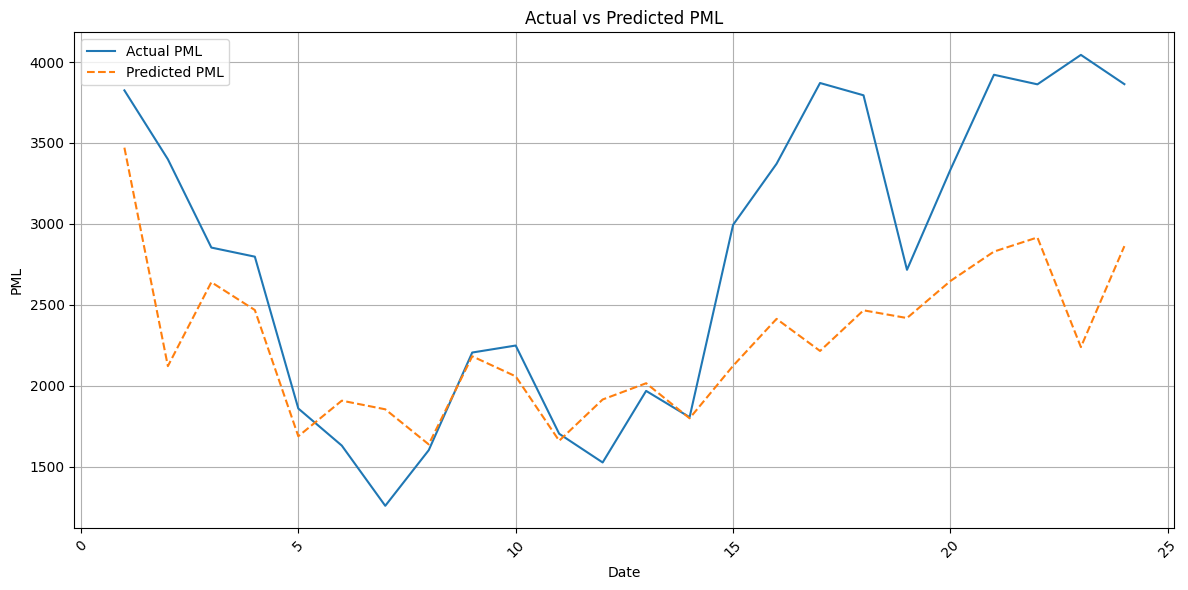

In [60]:
# Calculate error metrics
df_comparison["error"] = df_comparison["pml_real"] - df_comparison["pml_pred"]
df_comparison["abs_error"] = df_comparison["error"].abs()

# Show the comparison
print(df_comparison.head())

# Optional: plot comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_comparison["Hora"], df_comparison["pml_real"], label="Actual PML")
plt.plot(df_comparison["Hora"], df_comparison["pml_pred"], label="Predicted PML", linestyle="--")
plt.xlabel("Date")
plt.ylabel("PML")
plt.title("Actual vs Predicted PML")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()